# Imports

In [1]:
import time
import os,pickle
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import ellipk,ellipe,j0
from scipy.integrate import quad,dblquad
from numba import njit
from common import numerical_recipes as numrec
from common.baseclasses import AWA
from common import plotting
from importlib import reload
from scipy.linalg import eig,eigh,svd

import ProbeCavityEigenfields as PCE
from ProbeCavityEigenfields import RotationalMoM as RotMOM

<plotting>:
	Registered colormaps "Warm" and "Warm_r"...
<plotting>:
	Registered colormaps "vanheum" and "vanheum_r"...
<plotting>:
	Registered colormaps "NT-MDT" and "NT-MDT_r"...
<plotting>:
	Registered colormaps "rainbow" and "rainbow_r"...
<plotting>:
	Registered colormaps "jingdi" and "jingdi_r"...
<plotting>:
	Registered colormaps "Halcyon" and "Halcyon_r"...
<plotting>:
	Registered colormaps "Cold" and "Cold_r"...
<plotting>:
	Registered colormaps "Sky" and "Sky_r"...
<plotting>:
	Registered colormaps "Gwyddion.net" and "Gwyddion.net_r"...
<plotting>:
	Registered colormaps "BlueRed" and "BlueRed_r"...
<plotting>:
	Registered colormaps "vanheum3" and "vanheum3_r"...
<plotting>:
	Registered colormaps "vanheum2" and "vanheum2_r"...


/Users/alexandersmcleod/tools/python/common/plotting.py:56: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  pyplot.register_cmap(name='BWR', data=cdict)
/Users/alexandersmcleod/tools/python/common/plotting.py:78: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, lut))
  pyplot.register_cmap(name='BWR2', data=cdict)
/Users/alexandersmcleod/tools/python/common/plotting.py:100: MatplotlibDeprecationWarning: Passing raw data via parameters data and lut to register_cmap() is deprecated since 3.3 and will become an error two minor releases later. Instead use: register_cmap(cmap=LinearSegmentedColormap(name, data, l

# Build a Probe

In [32]:
#-- Geometric definitions - explicit lengths in nanometers

a_nm=20
taper_angle=35
Rtop=0
WL_THz_nm=300e3 #300 microns = 1 THz

#-- Geometric definitions - relative to probe radius

L=19e3/a_nm
freq_THz=a_nm/WL_THz_nm
freq=30*freq_THz

#-- Build probe

Nsubnodes=2
P=PCE.Probe(Nnodes=244,Nsubnodes=Nsubnodes,L=L,quadrature=numrec.TS,\
                 a=1,taper_angle=taper_angle,geometry='hyperboloid',Rtop=Rtop,
            freq=freq,gap=1)

#-- probe attributes

gap=P.get_gap()
zsprobe=P.get_zs()
rsprobe=P.get_radii()
k=P.get_k()

<ProbeCavityEigenfields.get_probe_radii>:
	Getting geometry for selection "hyperboloid"...
<ProbeCavityEigenfields.RotationalMoM.Discretization.__init__>:
	Discretizing body of revolution over 244 annular nodes and 2 subnodes...


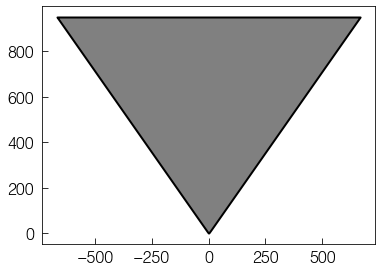

In [33]:
#-- Plot probe shape

plt.figure()
#plt.plot(-radii,zs,radii,zs,color='b')
xsprobe=np.append(-rsprobe[::-1],rsprobe)
ysprobe=np.append(zsprobe[::-1],zsprobe)
plt.fill_between(x=xsprobe,
                 y1=ysprobe,y2=L,
                 color='gray',edgecolor='k',lw=2)
plt.gca().set_aspect('equal')

(-1.0, 5.0)

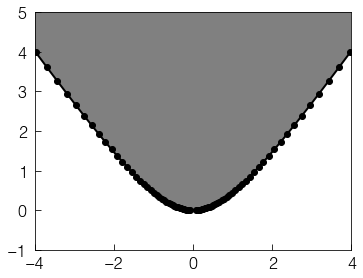

In [34]:
#-- Plot probe shape - zoom

plt.figure()
#plt.plot(-radii,zs,radii,zs,color='b')
plt.fill_between(x=xsprobe,
                 y1=ysprobe,y2=L,
                 color='gray',edgecolor='k',lw=2)
plt.plot(xsprobe,ysprobe,marker='o',ls='',color='k')
plt.gca().set_aspect('equal')
plt.xlim(-4,4)
plt.ylim(-1,5)

## Solve eigenoscillations

<ProbeCavityEigenfields.RotationalMoM.ImpedanceMatrix>:
	Preparing quasistatic mirror impedance matrix...
	Progress: 4.10%

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


	Progress: 99.59%	Total quadrature time: 2.36s, time per quadrature evaluation: 3.97E-05s
<ProbeCavityEigenfields.RotationalMoM.ImpedanceMatrix>:
	Preparing dynamic self impedance matrix...
	Progress: 99.59%	Total quadrature time: 7.57s, time per quadrature evaluation: 1.27E-04s


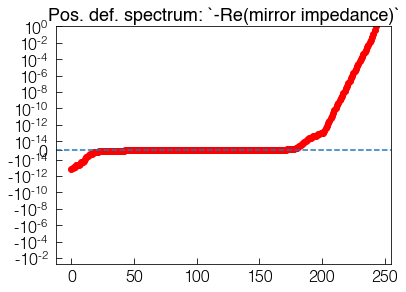

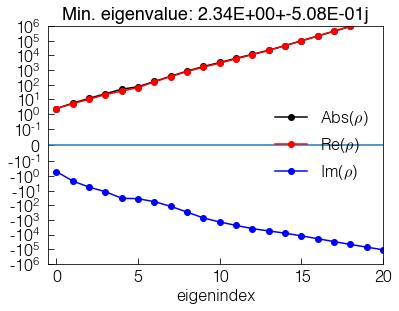

In [35]:
P.get_mirror_impedance(sommerfeld=False,k=0)
P.solve_eigenmodes(plot=True,condition_ZS=False)
P.plot_eigenrhos()

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


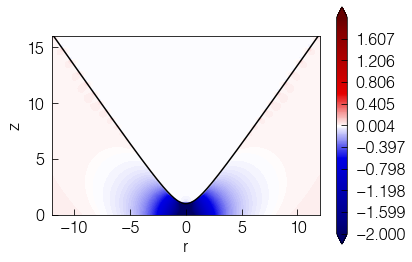

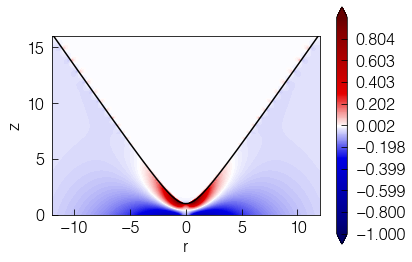

In [36]:
#--- Visualize the E-field from an eigenoscillation
#
# Computed in quasistatic approximation from exact electrodynamic charge solution
# Sums the probe field and the reflected eigenoscillation

n=1
Q=P.get_eigencharge(n)
eigenrho=P.get_eigenrho(n)
cl=2

at_rs=np.linspace(0,12,100)
at_zs=np.linspace(0,16,150)
Er,Ez=P.computeEfieldImages(Q, rho=eigenrho,
                            rs_out=at_rs, zs_out=at_zs,\
                            display=True,mirror_double_images=True)



plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
Ez.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl,cl,500),extend='both')
plt.clim(-cl,cl)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
Er.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl/2,cl/2,500),extend='both')
plt.clim(-cl/2,cl/2)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


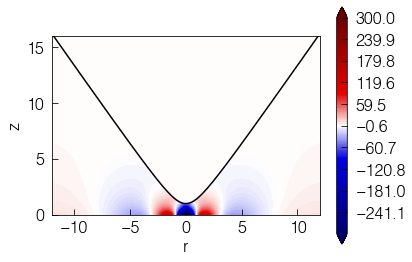

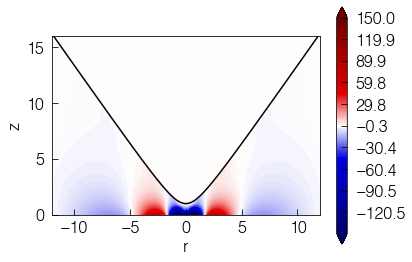

In [37]:
#--- Visualize the E-field from an eigenoscillation
#
# Computed in quasistatic approximation from exact electrodynamic charge solution
# Sums the probe field and the reflected eigenoscillation

n=7
Q=P.get_eigencharge(n)
eigenrho=P.get_eigenrho(n)
cl=300

at_rs=np.linspace(0,12,100)
at_zs=np.linspace(0,16,150)
Er,Ez=P.computeEfieldImages(Q, rho=eigenrho,
                            rs_out=at_rs, zs_out=at_zs,\
                            display=True,mirror_double_images=True)



plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
Ez.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl,cl,500),extend='both')
plt.clim(-cl,cl)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
Er.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl/2,cl/2,500),extend='both')
plt.clim(-cl/2,cl/2)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

## Excite the probe, see induced charge and scattered field

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


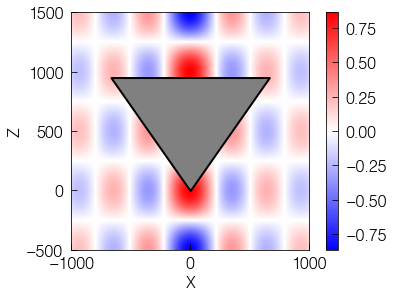

In [38]:
Er0,Ez0=PCE.EBesselBeamFF(angle=60, k = k)
#Zs,Xs=np.meshgrid(zs,xs)
Xs,Zs=np.ogrid[-1000:1000:1000j,
               -500:1500:1000j]; xs=Xs.squeeze(); zs=Zs.squeeze()
er0,ez0=Er0(Xs,Zs),Ez0(Xs,Zs)
ez0=AWA(ez0,axes=[xs,zs],axis_names=['X','Z'])
er0=AWA(er0,axes=[xs,zs],axis_names=['X','Z'])
ez0.real.plot(cmap='bwr')

plt.fill_between(x=xsprobe,
                 y1=np.append(zsprobe[::-1],zsprobe),y2=L,
                 color='gray',edgecolor='k',lw=2)
plt.gca().set_aspect('equal')

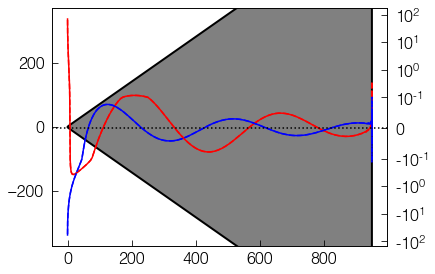

In [39]:
beta=2+1j; Nmodes=20

#-- Solve induced charge directly with boundary element method
Q1=P.solve_induced_charge_direct(Er=Er0,Ez=Ez0,rho=beta)
q1=P.get_charge_density(Q1)

#-- Solve induced charge with eigenoscillation expansion
Q2=P.solve_induced_charge_eigen(Er=Er0,Ez=Ez0,rho=beta, Veff=True, Nmodes=Nmodes)
q2=P.get_charge_density(Q2)


plt.fill_between(x=zsprobe,
                 y1=rsprobe,y2=-rsprobe,
                 color='gray',edgecolor='k',lw=2)
plt.gca().set_aspect('equal')

ax2=plt.twinx()
q1.real.plot(color='r')
q1.imag.plot(color='b')

q2.real.plot(color='r',ls='--')
q2.imag.plot(color='b',ls='--')
plt.gca().set_yscale('symlog',linthresh=.1)
plt.axhline(0,ls=':',color='k')

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


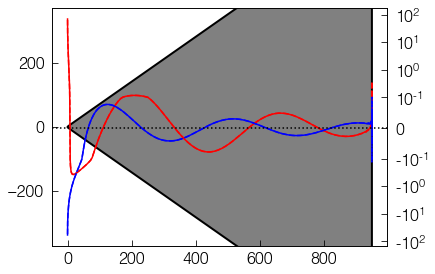

In [40]:
#-- Solve induced charge in a "scattered charge" formalism
Q0=P.solve_induced_charge_direct(Er=Er0,Ez=Ez0,rho=0)
q0=P.get_charge_density(Q0)

rhos=P.get_eigenrhos()
Qs=P.get_eigencharges()

excs=P.get_eigenexcitations(Er=Er0,Ez=Ez0,recompute=True)
dQs=[Q * beta/(rho*(rho-beta)) * exc for rho,exc,Q in zip(rhos,excs,Qs)]
dQ=np.sum(dQs[:Nmodes],axis=0)

Qtest=Q0-dQ
qtest =P.get_charge_density(Qtest)

#---
plt.fill_between(x=zsprobe,
                 y1=rsprobe,y2=-rsprobe,
                 color='gray',edgecolor='k',lw=2)
plt.gca().set_aspect('equal')
ax2.set_ylim(-1000,1000)

ax2=plt.twinx()
q1.real.plot(color='r')
q1.imag.plot(color='b')

qtest.real.plot(color='r',ls='--')
qtest.imag.plot(color='b',ls='--')
plt.gca().set_yscale('symlog',linthresh=.1)
plt.axhline(0,ls=':',color='k')

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


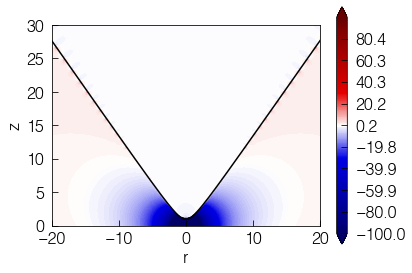

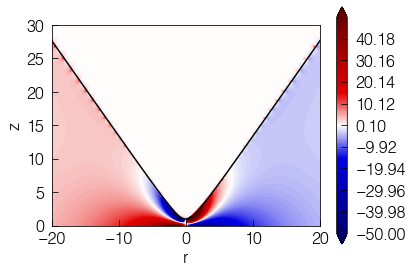

In [41]:
#--- Visualize the scattered E-field (and incident)
#
# Computed in quasistatic approximation from exact electrodynamic charge solution
# Sums incident field with that from the probe & sample (scattered field)

cl=100

at_rs=np.linspace(-20,20,200)
at_zs=np.linspace(0,30,150)
er0 = Er0(at_rs[:,np.newaxis],at_zs[np.newaxis,:])
ez0 = Ez0(at_rs[:,np.newaxis],at_zs[np.newaxis,:])

erScat,ezScat=P.computeEfieldImages(Q1, rho=beta,
                                    rs_out=at_rs, zs_out=at_zs,\
                                    display=True,mirror_double_images=False)

er = er0 + erScat
ez = ez0 + ezScat

plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
ez.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl,cl,500),extend='both')
plt.clim(-cl,cl)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

plt.figure()
plt.plot(xsprobe,ysprobe+1,color='k')
plt.gca().set_aspect('equal')
er.real.plot(plotter=plt.contourf,cmap='BWR',\
             levels=np.linspace(-cl/2,cl/2,500),extend='both')
plt.clim(-cl/2,cl/2)
plt.xlim(-at_rs.max(),at_rs.max())
plt.ylim(0,at_zs.max())
plt.gca().set_aspect('equal')

# Eigenoscillation spectroscopy

In [42]:
from ProbeCavityEigenfields import ProbeSpectroscopy as PS

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Energy spectroscopy

In [43]:
freqs = np.linspace(.1,100,150)*freq_THz # We could have some issue to evaluate at zero energy
Spectroscopy = PS.ProbeSpectroscopyParallel(P, coords=freqs,
                                            eigenset_calculator=PS.compute_eigenset_at_freq,\
                                            ncpus=8, backend='multiprocessing', Nmodes=20, gap=1, PhiM=False)
Spectroscopy.classify_eigensets(Nmodes=10, reversed=True)

Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Finished freq=0.00 THz, elapsed time: 7.3
Finished freq=0.00 THz, elapsed time: 7.6
Finished freq=0.00 THz, elapsed time: 7.8
Finished freq=0.00 THz, elapsed time: 7.9
Finished freq=0.00 THz, elapsed time: 8
Finished freq=0.00 THz, elapsed time: 8
Finished freq=0.00 THz, elapsed time: 8
Finished freq=0.00 THz, elapsed time: 8.1
got results!
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Starting freq=0.00
Finished freq=0.00 THz, elapsed time: 8.7
Finished freq=0.00 THz, elapsed time: 8.7
Finished freq=0.00 THz, elapsed time: 8.8
Finished freq=0.00 THz, elapsed time: 8.8
Finished freq=0.00 THz, elapsed time: 8.9
Finished freq=0.00 THz, elapsed time: 8.9Finished freq=0.00 THz, elapsed time: 8.9

Finished freq=0.00 THz, elapsed time: 9
got results!
Starti

Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
got results!
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Starting freq=0.01
Finished freq=0.01 THz, elapsed time: 14
Finished freq=0.01 THz, elapsed time: 14
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
Finished freq=0.01 THz, elapsed time: 15
got results!
Starting freq=0.01
Starting freq=0.01

Starting freq=0.01Starting freq=0.01

Starting freq=0.01Starting freq=0.01
Finished freq=0.01 THz, elapsed time: 13
Finished freq=0.01 THz, elapsed time: 13
Finished freq=0.01 THz, elapsed time: 13
Finished freq=0.01 THz, elapsed time: 13
Finished fr

<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeSpectroscopyParallel.get_eigenrhos_AWA>:
	For Nmodes=10, there were 150 identifiable mutual coordinates.


Text(0.5, 0, 'Frequency')

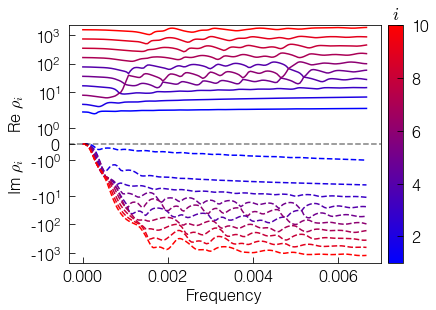

In [44]:
Spectroscopy.plot_eigenrhos()
#plt.gcf().axes[0].set_xlim(0,.001)
plt.gcf().axes[0].set_xscale('linear')
plt.gcf().axes[0].set_xlabel('Frequency')

### Kramers-Kronig analysis of poles

In [146]:
rhos=Spectroscopy.get_eigenrhos_AWA()
print(rhos.axis_names)

<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeSpectroscopyParallel.get_eigenrhos_AWA>:
	For Nmodes=10, there were 150 identifiable mutual coordinates.
['eigenindex', 'coordinate']


/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, '$1/\\rho_n$')

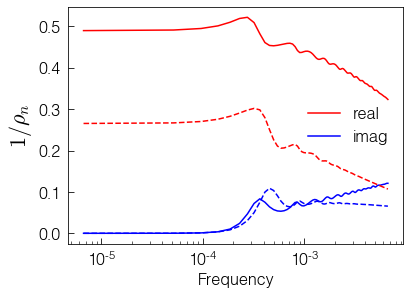

In [147]:
#--- See what some KK-compatible poles look like

(1/rhos[0]).real.plot(color='r',label='real')
(1/rhos[0]).imag.plot(color='b',label='imag')

(1/rhos[1]).real.plot(color='r',ls='--')
(1/rhos[1]).imag.plot(color='b',ls='--')

plt.legend()

plt.gca().set_xscale('log')
plt.xlabel('Frequency')
plt.ylabel(r'$1/\rho_n$',fontsize=22)

In [148]:
#--- Use a model (sum of lorentzians) to fit KK-compatible poles
def model_func(ws,params):
    
    Nosc=(len(params)-1)//3
    
    result=params[0]
    for iosc in range(Nosc):
        a,w1,w2=params[1+iosc*3:1+(iosc+1)*3]
        wresp=w1-1j*np.abs(w2)
        wresm=-w1-1j*np.abs(w2)
        result += a*(w1/(ws-wresp)-w1/(ws-wresm))
    
    return result

from common import numerical_recipes as numrec

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
#--- Fit this pole
n=4
P=1/rhos[n]

#--- Initial guess
params0=[.3]
for w1 in np.logspace(0,2,20)*.0003:
    params0+=[.05,w1,w1/3]

#--- Nonlinear least-squares (scipy.optimize.leastsq = Levenberg-Marquardt algo.)
n=0
P=1/rhos[n] #Fit this pole
result=numrec.ParameterFit(freqs,P,model_func,params0,\
                         limits=None,relative_error=False,\
                         verbose=False,error_exp=3,
                          ftol=1.49012e-12)[0]

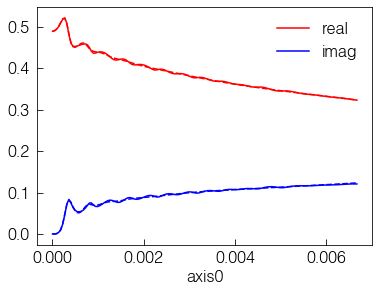

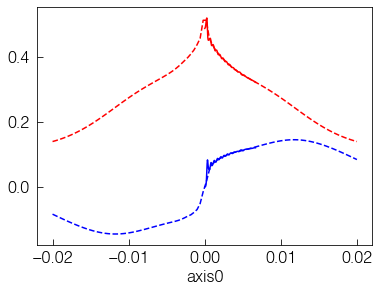

In [150]:
#--- Compare model pole to actual
Ptest=AWA(model_func(freqs,result),axes=[freqs])

P.real.plot(color='r',label='real')
P.imag.plot(color='b',label='imag')

Ptest.real.plot(color='r',ls='--')
Ptest.imag.plot(color='b',ls='--')

plt.legend()


plt.figure()
freqs2=np.linspace(-.02,.02,100)
Ptest=AWA(model_func(freqs2,result),axes=[freqs2])

P.real.plot(color='r')
P.imag.plot(color='b')

Ptest.real.plot(color='r',ls='--')
Ptest.imag.plot(color='b',ls='--')

In [143]:
#--- Fit this pole
n=4
P=1/rhos[n]

#--- Initial guess
#params0=[.3]
#for w1 in np.linspace(.001,.005,20):
#    params0+=[.05,w1,.001/3]
params0=params

#--- Nonlinear least-squares (scipy.optimize.leastsq = Levenberg-Marquardt algo.)
params=numrec.ParameterFit(freqs,P,model_func,params0,\
                         limits=None,relative_error=False,\
                         verbose=False,error_exp=1,
                          ftol=1.49012e-15)[0]

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


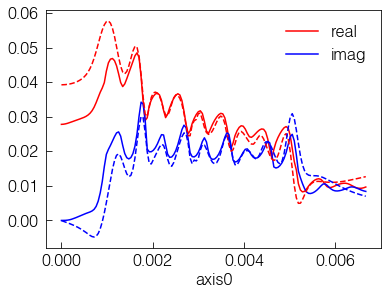

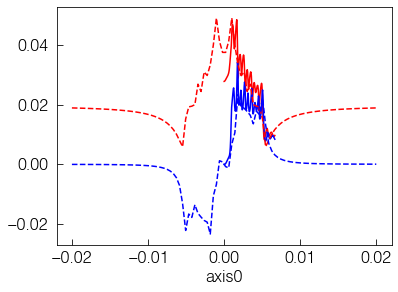

In [144]:
#--- Compare model pole to actual
Ptest=AWA(model_func(freqs,params),axes=[freqs])

P.real.plot(color='r',label='real')
P.imag.plot(color='b',label='imag')

Ptest.real.plot(color='r',ls='--')
Ptest.imag.plot(color='b',ls='--')

plt.legend()


plt.figure()
freqs2=np.linspace(-.02,.02,100)
Ptest=AWA(model_func(freqs2,result),axes=[freqs2])

P.real.plot(color='r')
P.imag.plot(color='b')

Ptest.real.plot(color='r',ls='--')
Ptest.imag.plot(color='b',ls='--')

## Probe-surface gap spectroscopy

<ProbeCavityEigenfields.RotationalMoM.ImpedanceMatrix>:
	Preparing dynamic self impedance matrix...
	Progress: 99.59%	Total quadrature time: 22.65s, time per quadrature evaluation: 3.80E-04s
Starting gap=0.01
Starting gap=0.01
Starting gap=0.01
Starting gap=0.01
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
Starting gap=0.01<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...

	Including evanescent (near-field) waves..
Starting gap=0.01<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...

	Including evanescent (near-field) waves..
Starting gap=0.01
Starting gap=0.01<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...

	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field

Starting gap=0.09	Including evanescent (near-field) waves..

<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
Finished gap=0.07, elapsed time: 0.61Finished gap=0.06, elapsed time: 0.62Finished gap=0.08, elapsed time: 0.58Finished gap=0.07,

	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
Finished gap=0.45, elapsed time: 0.52
Finished gap=0.41, elapsed time: 0.55
Finished gap=0.47, elapsed time: 0.53
Finished gap=0.43, elapsed time: 0.55
Finished gap=0.49, elapsed time: 0.53
Finished gap=0.56, elapsed time: 0.49
Finished gap=0.54, elapsed time: 0.52
Finished gap=0.51, elapsed time: 0.54
got results!
Starting gap=0.59
Starting gap=0.62
Starting gap=0.65
Starting gap=0.68
Starting gap=0.71
Starting gap=0.75<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...

Starting gap=0.78
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
Starting gap=0.82

Finished gap=2.73, elapsed time: 0.56
Finished gap=3.14, elapsed time: 0.54
Finished gap=3.29, elapsed time: 0.53
Finished gap=3.61, elapsed time: 0.52
got results!
Starting gap=3.78
Starting gap=3.96
Starting gap=4.14
Starting gap=4.34
Starting gap=4.55
Starting gap=4.76
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
Starting gap=4.99	Including evanescent (near-field) waves..

<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
Starting gap=5.23
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEige

Text(0.5, 0, 'Gap')

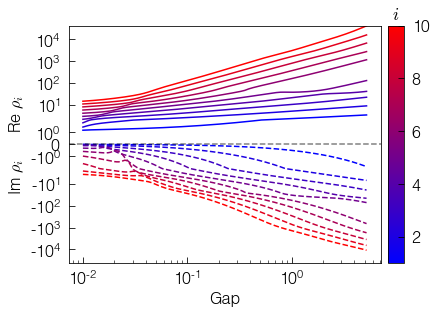

In [17]:
GapSpectroscopy = P.gapSpectroscopy(gaps=np.logspace(-2,1,150),Nkappas=244*4,Nmodes=20,
                                    recompute=True)
GapSpectroscopy.plot_eigenrhos()
plt.gcf().axes[0].set_xlabel('Gap')

In [18]:
Encoding = PS.EncodedEigenfields(GapSpectroscopy,gap0=1,Nmodes=20,Nkappas=244*4)

<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeGapSpectroscopyParallel.get_eigencharges_AWA>:
	For Nmodes=20, there were 136 mutual spectroscopy coordinates.
	Aligning eigencharge signage...
<ProbeCavityEigenfields.ProbeSpectroscopy.EncodedEigenfields.__init__>:
	Encoding eigenfields to gap=1.00 across 136 gap values from 0.01 to 5.225415213602953...
<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeGapSpectroscopyParallel.get_probe_at_coord>:
	Updating eigenrhos to coordinate 9.85E-01...
	Updating eigencharges...
	Updating self impedance...
<ProbeCavityEigenfields.Probe.getFourPotentialPropagators>:
	Computing field propagators...
	Including evanescent (near-field) waves..
<ProbeCavityEigenfields.ProbeSpectroscopy.ProbeGapSpectroscopyParallel.get_brightnesses_AWA>:
	Computing brightnesses across 136 spectroscopy coordinates...


In [19]:
from NearFieldOptics import Materials as M
rp = lambda freq,q: M.SiO2_300nm.reflection_p(freq/(a_nm*1e-7),\
                                              q/(a_nm*1e-7))

at_gaps = np.logspace(-1,.5,50)
freqs=np.linspace(15,50,200)*freq_THz

Erad = [Encoding.EradVsGap(at_gaps=at_gaps, freq=freq, rp=rp) for freq in freqs]
Erad=AWA(Erad,axes=[freqs/freq_THz,at_gaps],axis_names=['Frequency (THz)','Gap'])

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_295K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_360K.csv"...
<material_types.Ta

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


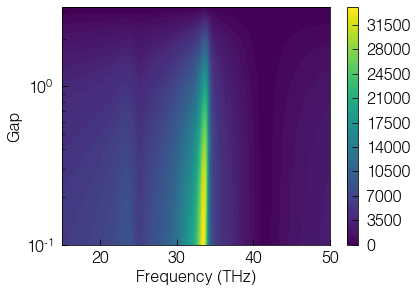

In [29]:
Erad_away = Erad[:,-1][:,np.newaxis]
np.abs(Erad-Erad_away).plot(plotter=plt.contourf)
plt.gca().set_yscale("log")

<>:8: DeprecationWarning: invalid escape sequence \m
<>:8: DeprecationWarning: invalid escape sequence \m
<>:8: DeprecationWarning: invalid escape sequence \m
<ipython-input-21-99ab55514a72>:8: DeprecationWarning: invalid escape sequence \m
  plt.ylabel('$|E_\mathrm{scat}$|',fontsize=20)


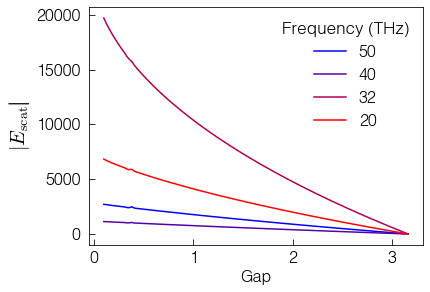

In [21]:
at_freqs = 20,32,40,50
cs=plotting.bluered_colors(len(at_freqs))

for at_freq in at_freqs[::-1]:
    Erad_at_freq=(Erad-Erad[:,-1][:,np.newaxis]).cslice[at_freq]
    np.abs(Erad_at_freq).plot(label=at_freq,color=next(cs))
                                                        
plt.ylabel('$|E_\mathrm{scat}$|',fontsize=20)
plt.legend(title='Frequency (THz)')

In [22]:
signals=Encoding.EradSpectrumDemodulated(freqs, rp=rp,
                                        gapmin=.1, amplitude=1.9,
                                        Ngaps=24*2, demod_order=5)
signals_ref=Encoding.EradSpectrumDemodulated(freqs=P.get_freq(),rp=1,
                                            gapmin=.1, amplitude=1.9,
                                            Ngaps=24*2, demod_order=5)

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


	Computing at freq=1.000E-03...
	Computing at freq=1.012E-03...
	Computing at freq=1.023E-03...
	Computing at freq=1.035E-03...
	Computing at freq=1.047E-03...
	Computing at freq=1.059E-03...
	Computing at freq=1.070E-03...
	Computing at freq=1.082E-03...
	Computing at freq=1.094E-03...
	Computing at freq=1.106E-03...
	Computing at freq=1.117E-03...
	Computing at freq=1.129E-03...
	Computing at freq=1.141E-03...
	Computing at freq=1.152E-03...
	Computing at freq=1.164E-03...
	Computing at freq=1.176E-03...
	Computing at freq=1.188E-03...
	Computing at freq=1.199E-03...
	Computing at freq=1.211E-03...
	Computing at freq=1.223E-03...
	Computing at freq=1.235E-03...
	Computing at freq=1.246E-03...
	Computing at freq=1.258E-03...
	Computing at freq=1.270E-03...
	Computing at freq=1.281E-03...
	Computing at freq=1.293E-03...
	Computing at freq=1.305E-03...
	Computing at freq=1.317E-03...
	Computing at freq=1.328E-03...
	Computing at freq=1.340E-03...
	Computing at freq=1.352E-03...
	Computi

/Users/alexandersmcleod/opt/anaconda3/envs/SciComp/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


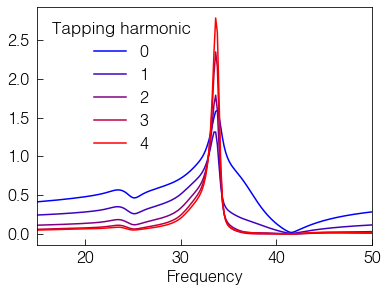

In [28]:
cs=plotting.bluered_colors(5)
for harmonic in range(5):
    normalized=(signals['Sn']/signals_ref['Sn'])[harmonic]
    np.abs(normalized).plot(color=next(cs),
                            label=harmonic)
for l in plt.gca().lines: l.set_xdata(l.get_xdata()/freq_THz)
plt.xlim(15,50)
plt.legend(title='Tapping harmonic')